In [1]:
import networkx as nx
import pandas as pd
import warnings
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()
print(G)

Graph with 0 nodes and 0 edges


In [3]:
G.is_directed()

False

Graph with 1 nodes and 0 edges


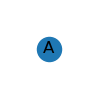

In [4]:
fig, ax = plt.subplots(figsize=(1,1))
G.add_node("A")
nx.draw(G, with_labels=True, ax=ax)
print(G)

Graph with 3 nodes and 0 edges


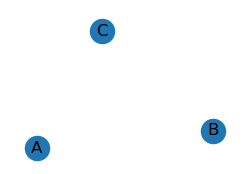

In [5]:
G.add_nodes_from(["B", "C"])

fig, ax = plt.subplots(figsize=(3, 2))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)

Graph with 3 nodes and 1 edges


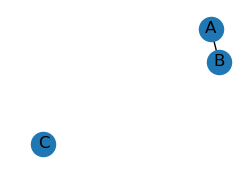

In [6]:
G.add_edge("A", "B")

fig, ax = plt.subplots(figsize=(3, 2))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)

Graph with 3 nodes and 3 edges


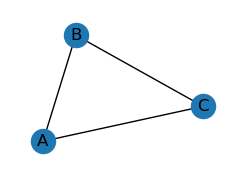

In [7]:
G.add_edges_from([("A", "C"), ("B", "C")])

fig, ax = plt.subplots(figsize=(3, 2))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)

Graph with 6 nodes and 5 edges


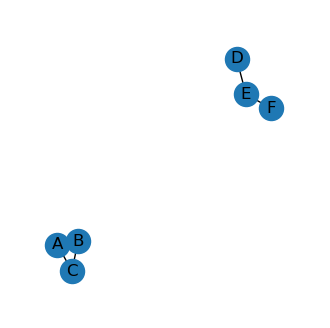

In [8]:
G.add_edges_from([("D", "E"), ("E", "F")])

fig, ax = plt.subplots(figsize=(4, 4))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)

In [9]:
adjM = nx.adjacency_matrix(G)

# Se convierte la matriz de formato sparse a dense para poder imprimirla
adjM = adjM.todense()
adjM

array([[0, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0]])

In [10]:
print(G.number_of_edges())
print(G.number_of_nodes())

5
6


In [11]:
print(f"Nodos del grafo: {G.nodes}")
print(f"Ejes del grafo: {G.edges}")

Nodos del grafo: ['A', 'B', 'C', 'D', 'E', 'F']
Ejes del grafo: [('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E'), ('E', 'F')]


In [17]:
adj =G.adjacency()
print(adj)
for u , neightbords in adj:
    print(u)
    print(neightbords)
    for v in neightbords:
        print(v)
    print("-"*20)    

A
{'B': {}, 'C': {}}
B
C
--------------------
B
{'A': {}, 'C': {}}
A
C
--------------------
C
{'A': {}, 'B': {}}
A
B
--------------------
D
{'E': {}}
E
--------------------
E
{'D': {}, 'F': {}}
D
F
--------------------
F
{'E': {}}
E
--------------------


In [11]:
conexiones = pd.DataFrame(
    {
        "inicio": ["A", "B", "C"],
        "fin": ["C", "C", "D"],
    }
)
conexiones

,inicio,fin
0,A,C
1,B,C
2,C,D


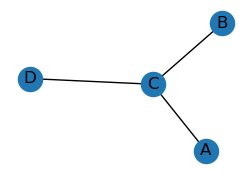

In [12]:
fig, ax = plt.subplots(figsize=(3,2))
G = nx.from_pandas_edgelist(conexiones, source="inicio", target="fin")
nx.draw(G, with_labels=True, ax=ax)

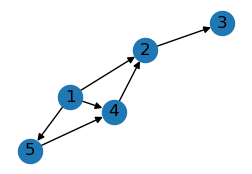

In [23]:
# Creación de un grafo dirigido".
# ======================================================================================
G = nx.DiGraph()

# Conexiones
G.add_edges_from([(1, 2), (2, 3), (1, 4), (1, 5), (4, 2), (5, 4)])

# Representación gráfica
fig, ax = plt.subplots(figsize=(3,2))
nx.draw(G, with_labels=True, ax=ax)

In [24]:
G = nx.Graph()

# Nodos y conexiones
G.add_weighted_edges_from(
    [("A", "B", 0.5),
    ("B", "C", 0.9),
    ("A", "D", 0.1),
    ("A", "E", 0.75),
    ("D", "B", 0.01),
    ("E", "D", 0.3)]
)
G.edges(data=True)

EdgeDataView([('A', 'B', {'weight': 0.5}), ('A', 'D', {'weight': 0.1}), ('A', 'E', {'weight': 0.75}), ('B', 'C', {'weight': 0.9}), ('B', 'D', {'weight': 0.01}), ('D', 'E', {'weight': 0.3})])

In [14]:
G.is_directed()

False

In [15]:
nx.is_weighted(G)

True

In [16]:
[a for a in G.edges(data=True)]

[('A', 'B', {'weight': 0.5}),
 ('A', 'D', {'weight': 0.1}),
 ('A', 'E', {'weight': 0.75}),
 ('B', 'C', {'weight': 0.9}),
 ('B', 'D', {'weight': 0.01}),
 ('D', 'E', {'weight': 0.3})]

In [17]:
weights = [a[2]["weight"] for a in G.edges(data=True)]
weights

[0.5, 0.1, 0.75, 0.9, 0.01, 0.3]

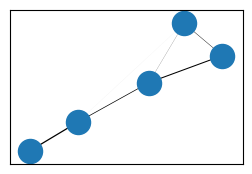

In [18]:
pos = nx.spring_layout(G)

# Representar nodos y ejes
fig, ax = plt.subplots(figsize=(3,2))
nx.draw_networkx_nodes(
    G,
    pos = pos,
    ax = ax
)
nx.draw_networkx_edges(
    G,
    pos = pos,
    edgelist = G.edges,
    width = weights,
    ax = ax
)

In [19]:
GM = nx.Graph()

# Nodos y vonexiones
GM.add_weighted_edges_from(
    [(1, 2, 0.5),
     (1, 3, 0.9),
     (2,3,0.4),
     (2,1,0.4),
     (1,4,0.7)]
)
GM.edges(data=True)

EdgeDataView([(1, 2, {'weight': 0.4}), (1, 3, {'weight': 0.9}), (1, 4, {'weight': 0.7}), (2, 3, {'weight': 0.4})])

In [25]:
weights = [a[2]["weight"] for a in G.edges(data=True)]
weights

[0.5, 0.1, 0.75, 0.9, 0.01, 0.3]

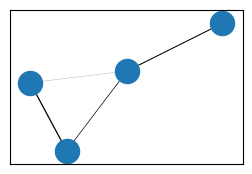

In [20]:
pos = nx.spring_layout(GM)

# Representar nodos y ejes
fig, ax = plt.subplots(figsize=(3,2))
nx.draw_networkx_nodes(
    GM,
    pos = pos,
    ax = ax
)
nx.draw_networkx_edges(
    GM,
    pos = pos,
    edgelist = GM.edges,
    width = weights,
    ax = ax
)

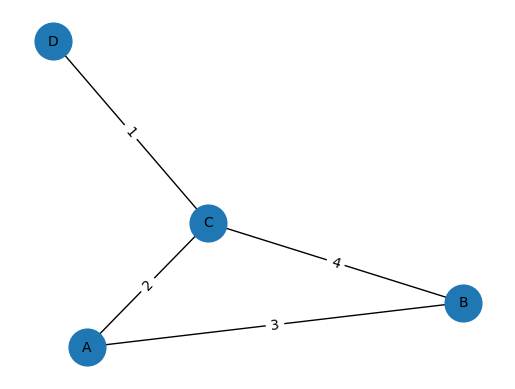

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.Graph()
G.add_edges_from([('A', 'B', {'weight': 3}), ('A', 'C', {'weight': 2}),
                 ('B', 'C', {'weight': 4}), ('C', 'D', {'weight': 1})])

# Get edge weights and labels
edge_labels = nx.get_edge_attributes(G, 'weight')

# Create a spring layout for positions
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=1) 

nx.draw_networkx_labels(G, pos, font_size=10,
 font_family='sans-serif')

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()